# Data Analysis and Visualizations on the 911 calls from Montogomery County, PA

## Section 1: Imports and getting simple insights from our data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
# The Cell Below shows the 5 highest locations by zipcode with 911 distress calls in the county
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [5]:
# The Cell Below shows the top 5 townships with 911 distress calls in the county
df["twp"].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [6]:
# The cell below shows the number of unique values in the title column
df['title'].nunique()

110

## Adding new features to our dataset

In [7]:
# The cell below extracts the reason for the call from the title column
def call_reason(data):
    reasons = data.split(':')
    return reasons[0]

df['reason'] = df['title'].apply(call_reason)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [8]:
# This Cell Computes the most common reason for a call in the county
df['reason'].value_counts().head(1)

reason
EMS    48877
Name: count, dtype: int64

In [9]:
# This cell converts the datatype of the elements in the timestamp column from str to datetime
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [10]:
# The newly converted datetime column is used to create new hour, month and day of the week columns
time = df["timeStamp"].iloc[0]
# Hour
df["hour"] = df.timeStamp.apply(lambda time: time.hour)
# month
months = [
    "January",
    "February",
    "March",
    "April",
    "May",
    "June",
    "July",
    "August",
    "September",
    "October",
    "November",
    "December",
]
df["month"] = df.timeStamp.apply(lambda time: months[time.month - 1])
# Day of the week
dow = "Monday Tuesday Wednesday Thursday Friday Saturday Sunday".split()
df["dow"] = df.timeStamp.apply(lambda time: dow[time.dayofweek])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dow
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,December,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,December,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,December,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,December,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,December,Thursday


In [16]:
df["date"] = df['timeStamp'].apply(lambda t: t.date())

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dow,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,December,Thursday,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,December,Thursday,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,December,Thursday,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,December,Thursday,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,December,Thursday,2015-12-10


## Visualizations

<Axes: xlabel='reason', ylabel='count'>

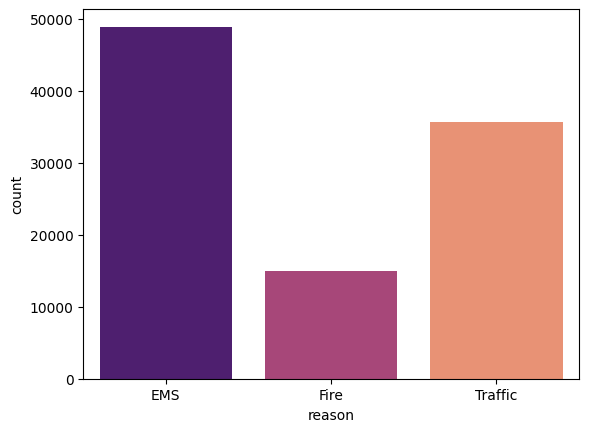

In [12]:
# A countplot which shows the number of occurences of categorical data (reason, in this case) in a dataset. From the above, it is obviouss that EMS Has the highest number of occurences
sns.countplot(data=df, x="reason", hue='reason', palette='magma')

<Axes: xlabel='dow', ylabel='count'>

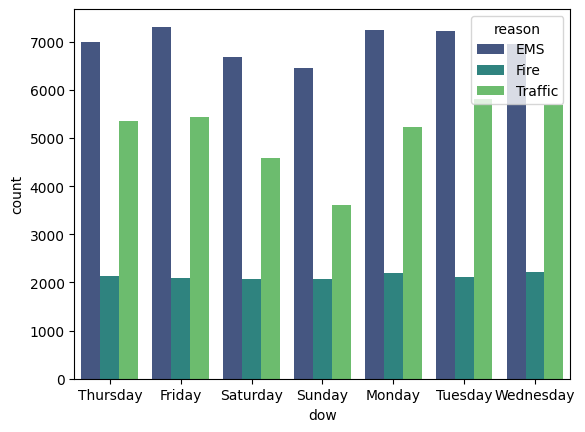

In [13]:
# A countplot which shows the number of occurences of 911 calls on each day of the week in the dataset and further broken down to show how many per day for a particular reason. From the above, EMS calls on friday, monday and tuesday had the highes occurences
sns.countplot(data=df, x='dow', hue='reason', palette='viridis')

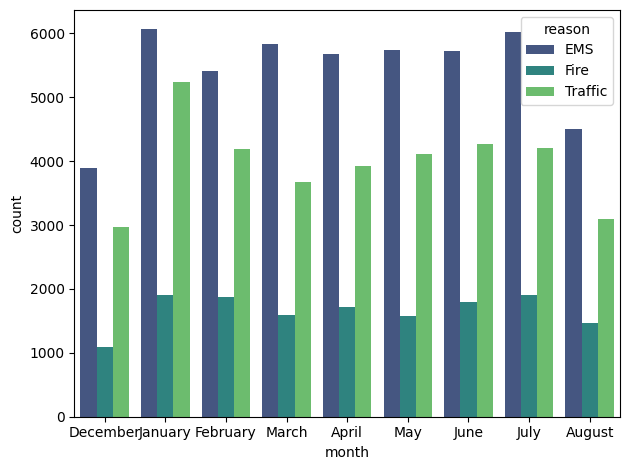

In [15]:
# Same as the cell above but for the month column. EMS calls in july and january seem to have the highes occurrences. With significant dropoffs in December and August
sns.countplot(data=df, x="month", hue="reason", palette="viridis")
plt.tight_layout()

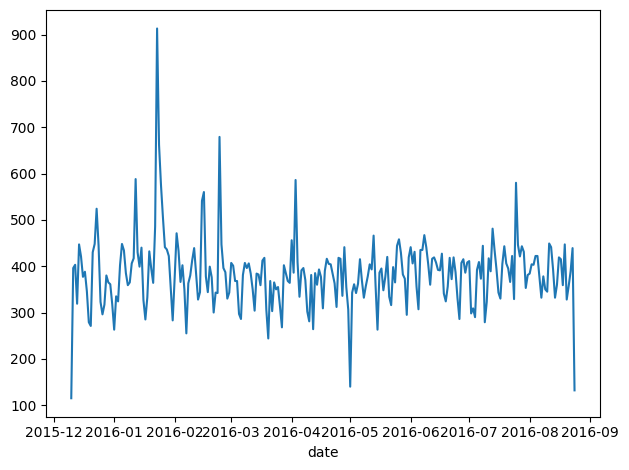

In [20]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'Traffic')

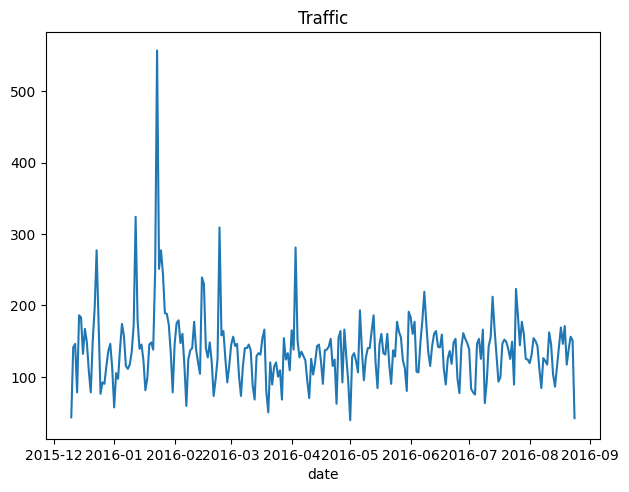

In [22]:
df[df['reason'].str.lower() == 'traffic'].groupby("date").count()["lat"].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5, 1.0, 'EMS')

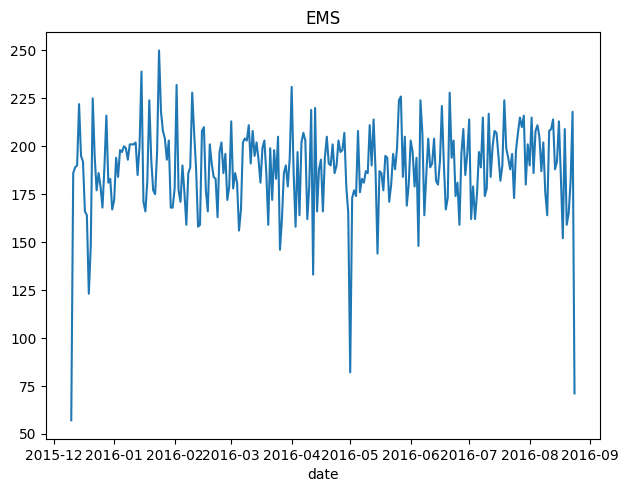

In [23]:
df[df["reason"].str.lower() == "ems"].groupby("date").count()["lat"].plot()
plt.tight_layout()
plt.title("EMS")

Text(0.5, 1.0, 'Fire')

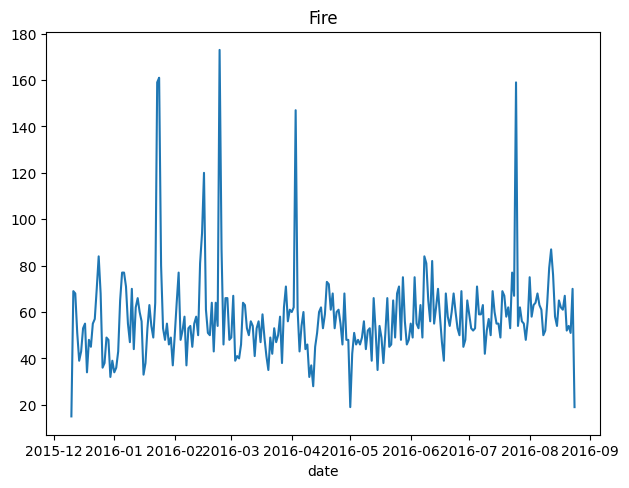

In [24]:
df[df["reason"].str.lower() == "fire"].groupby("date").count()["lat"].plot()
plt.tight_layout()
plt.title("Fire")

<Axes: xlabel='hour', ylabel='dow'>

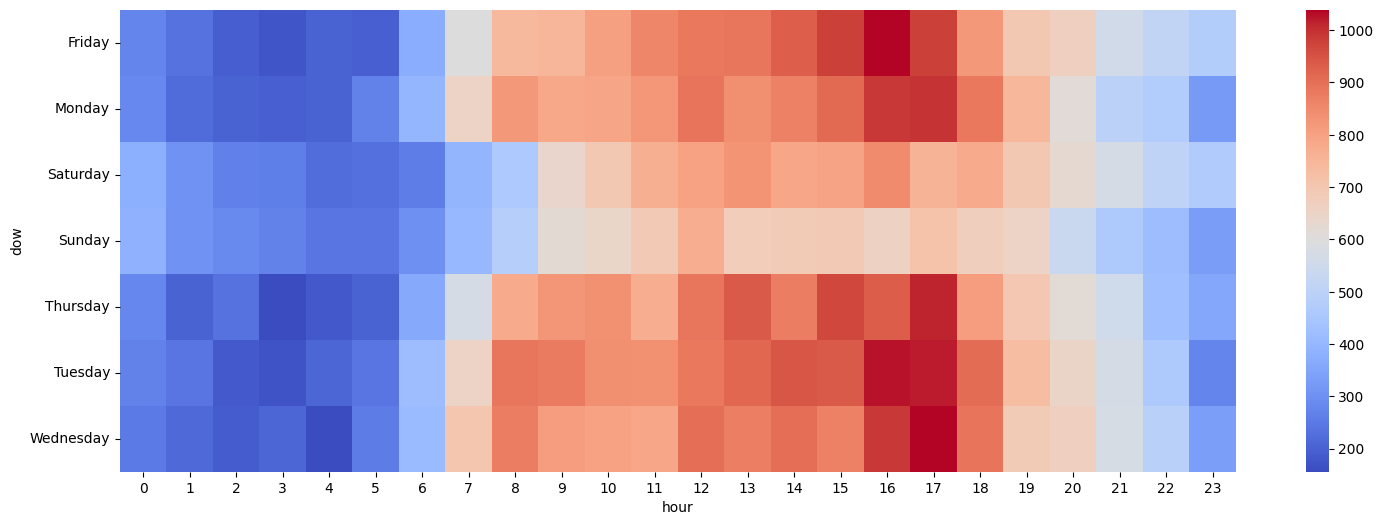

In [32]:
# Creating a heatmap to show call count
dayHour = df.groupby(by=['dow', 'hour']).count()['reason'].unstack()
plt.figure(figsize=(18,6))
sns.heatmap(dayHour, cmap='coolwarm')

<Axes: xlabel='month', ylabel='dow'>

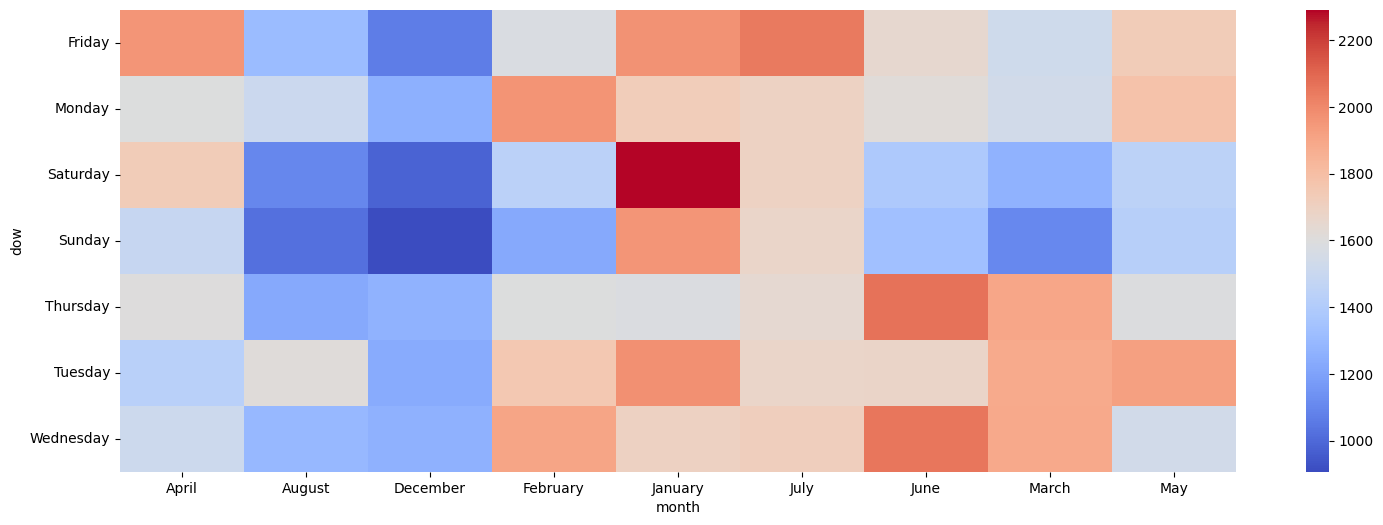

In [33]:
# Same as above but month instead of hour
dayHour = df.groupby(by=["dow", "month"]).count()["reason"].unstack()
plt.figure(figsize=(18, 6))
sns.heatmap(dayHour, cmap="coolwarm")